## **Pengumpulan Data**

data dikumpulkan dari website visual crossing, website yang menyediakan data cuaca yang dikumpulkan dari stasiun cuaca yang ada di indonesia\


In [ ]:
#import library
import pandas as pd

# Load data
raw_df = pd.read_csv('https://raw.githubusercontent.com/IkbarIbrahim/prediksi-cuaca-harian-gresik/refs/heads/main/Gresik_2020-01-01_to_2024-12-21.csv')
pd.options.display.float_format = '{:.0f}'.format
raw_df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Gresik,1/1/2020,30,25,28,37,25,30,24,84,...,6,3,NaN,2020-01-01T05:16:40,2020-01-01T17:48:31,0,"Rain, Overcast",Cloudy skies throughout the day with morning r...,rain,"96933099999,96935099999,remote"
1,Gresik,1/2/2020,33,25,28,40,25,32,24,81,...,21,8,NaN,2020-01-02T05:17:11,2020-01-02T17:48:56,0,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96933099999,96935099999,remote"
2,Gresik,1/3/2020,33,26,28,38,26,32,25,81,...,18,7,NaN,2020-01-03T05:17:43,2020-01-03T17:49:21,0,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96933099999,96935099999,remote"
3,Gresik,1/4/2020,32,26,28,39,26,31,25,82,...,17,7,NaN,2020-01-04T05:18:14,2020-01-04T17:49:45,0,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"96933099999,96935099999,remote"
4,Gresik,1/5/2020,34,25,28,42,25,31,24,81,...,18,9,NaN,2020-01-05T05:18:45,2020-01-05T17:50:08,0,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96933099999,96935099999,remote"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Gresik,12/17/2024,30,25,27,33,25,28,22,77,...,13,4,10,2024-12-17T05:09:33,2024-12-17T17:41:48,1,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,NaN
1813,Gresik,12/18/2024,31,25,27,33,25,29,22,72,...,14,5,10,2024-12-18T05:10:01,2024-12-18T17:42:19,1,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
1814,Gresik,12/19/2024,33,25,29,37,25,31,22,69,...,22,9,10,2024-12-19T05:10:30,2024-12-19T17:42:49,1,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN
1815,Gresik,12/20/2024,33,25,28,37,25,30,23,74,...,20,9,10,2024-12-20T05:10:59,2024-12-20T17:43:19,1,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,NaN


## **Plotting Data**

In [ ]:
df = raw_df.copy()
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y')
df['datetime'] = df['datetime'].dt.date
df.set_index('datetime', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1817 entries, 2020-01-01 to 2024-12-21
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1817 non-null   object 
 1   tempmax           1817 non-null   float64
 2   tempmin           1817 non-null   float64
 3   temp              1817 non-null   float64
 4   feelslikemax      1817 non-null   float64
 5   feelslikemin      1817 non-null   float64
 6   feelslike         1817 non-null   float64
 7   dew               1817 non-null   float64
 8   humidity          1817 non-null   float64
 9   precip            1817 non-null   float64
 10  precipprob        1817 non-null   float64
 11  precipcover       1817 non-null   float64
 12  preciptype        1456 non-null   object 
 13  snow              1817 non-null   int64  
 14  snowdepth         1817 non-null   int64  
 15  windgust          1817 non-null   float64
 16  windspeed         1817 n

drop dahulu fitur yang tidak berguna

In [ ]:
df.drop(['name', 'sunrise', 'sunset', 'snow', 'snowdepth'], inplace=True, axis=1)
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01,30,25,28,37,25,30,24,84,2,100,...,7,72,6,3,NaN,0,"Rain, Overcast",Cloudy skies throughout the day with morning r...,rain,"96933099999,96935099999,remote"
2020-01-02,33,25,28,40,25,32,24,81,6,100,...,8,240,21,8,NaN,0,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96933099999,96935099999,remote"
2020-01-03,33,26,28,38,26,32,25,81,8,100,...,8,206,18,7,NaN,0,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96933099999,96935099999,remote"
2020-01-04,32,26,28,39,26,31,25,82,0,100,...,9,192,17,7,NaN,0,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"96933099999,96935099999,remote"
2020-01-05,34,25,28,42,25,31,24,81,18,100,...,7,212,18,9,NaN,0,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96933099999,96935099999,remote"


### Encode

In [ ]:
df_encoded = df.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_cols = ['preciptype', 'stations', 'conditions', 'description', 'icon']

# Label Encoding untuk kolom ordinal
label_encoder = LabelEncoder()
for col in label_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col].astype(str))

# One-Hot Encoding untuk kolom yang memiliki banyak kategori (nominal)
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Pastikan tidak ada kolom object setelah encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1817 entries, 2020-01-01 to 2024-12-21
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           1817 non-null   float64
 1   tempmin           1817 non-null   float64
 2   temp              1817 non-null   float64
 3   feelslikemax      1817 non-null   float64
 4   feelslikemin      1817 non-null   float64
 5   feelslike         1817 non-null   float64
 6   dew               1817 non-null   float64
 7   humidity          1817 non-null   float64
 8   precip            1817 non-null   float64
 9   precipprob        1817 non-null   float64
 10  precipcover       1817 non-null   float64
 11  preciptype        1817 non-null   int64  
 12  windgust          1817 non-null   float64
 13  windspeed         1817 non-null   float64
 14  winddir           1817 non-null   float64
 15  sealevelpressure  1817 non-null   float64
 16  cloudcover        1817 n

### korelasi fitur

In [ ]:
df_encoded.corr().style.background_gradient(cmap='viridis')

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,icon,stations
tempmax,1.000000,0.283174,0.776937,0.440847,0.280783,0.586433,-0.141795,-0.607192,-0.201606,-0.196240,-0.091881,-0.185130,-0.131433,0.001273,-0.260406,0.101591,-0.227914,0.100093,0.642165,0.642580,0.563245,-0.040338,0.033095,-0.176612,0.060956,-0.195183,-0.096374
tempmin,0.283174,1.000000,0.630705,0.536766,0.910070,0.753288,0.600488,0.067077,-0.026965,0.323014,0.245102,0.295852,-0.030574,-0.173300,-0.007902,-0.171985,0.292087,0.076363,-0.029257,-0.028022,-0.050274,0.355304,0.005080,0.312597,-0.159204,0.319741,-0.219858
temp,0.776937,0.630705,1.000000,0.426317,0.601492,0.897363,0.085152,-0.586629,-0.293227,-0.117970,-0.000778,-0.099431,-0.179617,-0.128589,-0.397043,0.115461,-0.129516,0.175704,0.547432,0.547300,0.458440,-0.005223,0.016589,-0.105832,0.042910,-0.117322,-0.210945
feelslikemax,0.440847,0.536766,0.426317,1.000000,0.461645,0.646986,0.704923,0.302267,0.146191,0.404611,0.260773,0.358282,-0.109072,-0.160303,0.098521,-0.242233,0.099569,-0.139647,0.053942,0.055124,0.058244,0.499405,0.053940,0.416850,-0.166372,0.401626,0.015647
feelslikemin,0.280783,0.910070,0.601492,0.461645,1.000000,0.720026,0.493592,-0.001248,-0.045832,0.236437,0.200289,0.220197,-0.014020,-0.126649,-0.044630,-0.116431,0.229599,0.088959,0.026566,0.027270,-0.002249,0.285944,0.011947,0.232874,-0.109583,0.234785,-0.211283
feelslike,0.586433,0.753288,0.897363,0.646986,0.720026,1.000000,0.459951,-0.223024,-0.172863,0.119214,0.147204,0.122150,-0.199835,-0.219877,-0.299813,0.002311,-0.015801,0.084550,0.324657,0.324566,0.262981,0.233683,0.024429,0.131007,-0.037642,0.118480,-0.175521
dew,-0.141795,0.600488,0.085152,0.704923,0.493592,0.459951,1.000000,0.753007,0.277863,0.613888,0.367690,0.569212,-0.022808,-0.199313,0.252599,-0.341605,0.339713,-0.189463,-0.419118,-0.418027,-0.373758,0.579009,0.028382,0.606391,-0.232411,0.610066,-0.003902
humidity,-0.607192,0.067077,-0.586629,0.302267,-0.001248,-0.223024,0.753007,1.000000,0.431497,0.575675,0.295592,0.524301,0.109154,-0.061569,0.476085,-0.361127,0.349852,-0.277065,-0.691345,-0.690305,-0.597419,0.522563,0.015405,0.563249,-0.212034,0.572038,0.148025
precip,-0.201606,-0.026965,-0.293227,0.146191,-0.045832,-0.172863,0.277863,0.431497,1.000000,0.285307,0.119306,0.240559,0.104685,0.036125,0.271534,-0.155985,0.306934,-0.169593,-0.310374,-0.308979,-0.260880,0.340997,0.006312,0.266298,-0.103597,0.281955,-0.005572
precipprob,-0.196240,0.323014,-0.117970,0.404611,0.236437,0.119214,0.613888,0.575675,0.285307,1.000000,0.469913,0.842492,0.004488,-0.144281,0.326737,-0.314703,0.394615,-0.125066,-0.414851,-0.412765,-0.352475,0.460791,0.030981,0.985504,-0.376863,0.987472,0.021284


kode untuk mendrop jika fitur kurang dari nilai yang ditentukan

In [ ]:
import pandas as pd

# Hitung matriks korelasi
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan 'temp'
temp_correlation = correlation_matrix["temp"].sort_values(ascending=False)

# Menentukan fitur dengan korelasi rendah (misalnya < 0.3 atau < -0.3)
threshold = 0.7
low_correlation_features = temp_correlation[abs(temp_correlation) < threshold].index.tolist()

# Menampilkan fitur dengan korelasi rendah
print("\nFitur yang memiliki korelasi rendah dengan 'temp' (kurang dari threshold):")
print(low_correlation_features)

# Menghapus fitur dengan korelasi rendah
df_dropped = df_encoded.drop(columns=low_correlation_features)

# Menampilkan DataFrame setelah fitur dihapus
print("\nDataFrame setelah menghapus fitur dengan korelasi rendah:")
print(df_dropped.head())



Fitur yang memiliki korelasi rendah dengan 'temp' (kurang dari threshold):
['tempmin', 'feelslikemin', 'solarradiation', 'solarenergy', 'uvindex', 'feelslikemax', 'visibility', 'sealevelpressure', 'dew', 'description', 'moonphase', 'precipcover', 'severerisk', 'preciptype', 'conditions', 'icon', 'precipprob', 'windspeed', 'cloudcover', 'windgust', 'stations', 'precip', 'winddir', 'humidity']

DataFrame setelah menghapus fitur dengan korelasi rendah:
            tempmax  temp  feelslike
datetime                            
2020-01-01       30    28         30
2020-01-02       33    28         32
2020-01-03       33    28         32
2020-01-04       32    28         31
2020-01-05       34    28         31


In [ ]:
df_dropped.head()

,tempmax,temp,feelslike
datetime,,,
2020-01-01,30,28,30
2020-01-02,33,28,32
2020-01-03,33,28,32
2020-01-04,32,28,31
2020-01-05,34,28,31


In [ ]:
columns_order = [col for col in df_dropped.columns if col != 'temp'] + ['temp']

# Mengubah urutan kolom
df = df_dropped[columns_order]
df.drop(['tempmax'],inplace=True,axis=1)
df.head()

<ipython-input-99-a0f00cbf180d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['tempmax'],inplace=True,axis=1)


,feelslike,temp
datetime,,
2020-01-01,30,28
2020-01-02,32,28
2020-01-03,32,28
2020-01-04,31,28
2020-01-05,31,28


ubah posisi dari setiap kolom

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def normalize(df, fit_scaler=True, scaler=None):
    """
    Normalizes the input DataFrame using MinMaxScaler.

    Args:
        df (pd.DataFrame): The DataFrame to normalize.
        fit_scaler (bool, optional): Whether to fit the scaler. Defaults to True.
        scaler (MinMaxScaler, optional): Pre-fitted scaler. Defaults to None.

    Returns:
        tuple: A tuple containing the normalized DataFrame and the scaler.
    """
    # Convert the DataFrame to a NumPy array
    np_data_unscaled = np.array(df)

    if fit_scaler:
        # Create a new MinMaxScaler if fit_scaler is True
        scaler = MinMaxScaler()
        # Fit and transform the data using the scaler
        np_data_scaled = scaler.fit_transform(np_data_unscaled)
    else:
        # Transform the data using the pre-fitted scaler
        np_data_scaled = scaler.transform(np_data_unscaled)

    # Create a new DataFrame from the scaled data
    normalized_data = pd.DataFrame(np_data_scaled, columns=df.columns, index=df.index)
    # Set the display format for floats
    pd.set_option('display.float_format', '{:.4f}'.format)

    return normalized_data, scaler

# Call the normalize function with 'df' instead of 'data'
df, scaler = normalize(df, fit_scaler=True)
df.head()

,feelslike,temp
datetime,,
2020-01-01,0.3583,0.3710
2020-01-02,0.4833,0.4839
2020-01-03,0.5167,0.5161
2020-01-04,0.4583,0.4677
2020-01-05,0.4583,0.4839


## Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fungsi untuk membuat data dalam bentuk X (input) dan y (output) dengan sliding window
def create_dataset(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps -1): #dikurangi 1 agar tidak out of bounds
        a = data[i:(i + time_steps)].values #ubah ke numpy array menggunakan .values
        X.append(a)
        y.append(data.iloc[i + time_steps].values)  #iloc untuk mengakses data menggunakan index numerik
    return np.array(X), np.array(y)

# Membagi data menjadi input-output untuk model
X, y = create_dataset(df, time_steps=3)
# Menampilkan bentuk data
print("Shape of X:", X.shape)  # (samples, 3, 2) -> 3 time steps, 2 fitur
print("Shape of y:", y.shape)  # (samples, 2) -> 2 fitur sebagai target

Shape of X: (1813, 3, 2)
Shape of y: (1813, 2)


In [ ]:
# Membagi data menjadi 80% training dan 20% testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menampilkan bentuk data training dan testing
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (1450, 3, 2) (1450, 2)
Testing data shape: (363, 3, 2) (363, 2)


### LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Membuat model LSTM
model = Sequential()

# Menambahkan lapisan LSTM
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Menambahkan lapisan Dense untuk output
model.add(Dense(units=2))  # Karena kita punya 2 fitur sebagai output (Gula Premium dan Gula Lokal)

# Menyusun model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50)                  │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,702 (41.80 KB)

 Trainable params: 10,702 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1930 - val_loss: 0.0211
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - val_loss: 0.0190
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - val_loss: 0.0187
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - val_loss: 0.0195
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 - val_loss: 0.0182
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - val_loss: 0.0177
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - val_loss: 0.0175
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - val_loss: 0.0169
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - val_loss: 0.0169
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - val_loss: 0.0164
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - val_loss: 0.0163
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

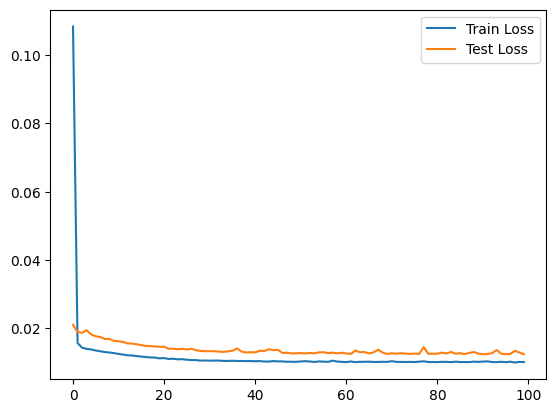

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



# Menampilkan grafik loss selama pelatihan
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Menghitung MSE pada data test
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Prediksi untuk test set
y_pred = model.predict(X_test)

# Denormalisasi hasil prediksi dan data aktual
y_pred_denorm = scaler.inverse_transform(y_pred)
y_test_denorm = scaler.inverse_transform(y_test)

# Menampilkan beberapa hasil prediksi
for i in range(5):
    print(f"Prediksi: {y_pred_denorm[i]}, Aktual: {y_test_denorm[i]}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 
Test Loss (MSE): 0.012471193447709084
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediksi: [34.17026  29.859724], Aktual: [35.1 29.8]
Prediksi: [34.670383 29.769104], Aktual: [31.4 28. ]
Prediksi: [31.627106 28.273207], Aktual: [32.6 28.8]
Prediksi: [32.970444 28.903725], Aktual: [34.5 29.6]
Prediksi: [33.742714 29.265808], Aktual: [36.2 29.8]


In [ ]:
import joblib
model.save('lstm_model.h5')

joblib.dump(scaler, 'scaler.sav')

['scaler.sav']

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load model dan scaler
model = load_model('lstm_model.h5')
scaler = joblib.load('scaler.sav')

# Data terakhir yang akan diprediksi (pastikan data ini dalam format yang benar)
last_input = np.array([ [33, 28],
                        [34, 29],
                        [32, 27]])  # Ambil 3 waktu langkah terakhir sebagai input

# Lakukan scaling pada input terakhir dengan scaler
last_input_scaled = scaler.transform(last_input)

# List untuk menyimpan hasil prediksi
predictions_list = []

# Prediksi untuk 2 minggu ke depan
for _ in range(5):  # Prediksi 5 periode (misalnya minggu ke-1, ke-2, dst)
    # Melakukan prediksi dengan input yang sudah discale
    prediction = model.predict(last_input_scaled.reshape(1, 3, 2))  # Mengubah bentuk input sesuai yang dibutuhkan LSTM
    prediction_denorm = scaler.inverse_transform(prediction)  # Denormalisasi hasil prediksi
    print(f"Prediksi minggu ke-{_+1}: {prediction_denorm}")

    # Menyimpan hasil prediksi dalam list
    predictions_list.append(prediction_denorm.flatten())  # Gunakan flatten agar prediksi berbentuk array 1D

    # Update input dengan prediksi terbaru dan lakukan scaling pada prediksi baru
    last_input_scaled = np.append(last_input_scaled[1:], prediction, axis=0)

# Konversi list hasil prediksi ke dalam array numpy (optional)
predictions_array = np.array(predictions_list)

# Print hasil dalam array numpy
print("Hasil prediksi dalam bentuk array numpy:")
print(predictions_array)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Prediksi minggu ke-1: [[31.501982 27.340624]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediksi minggu ke-2: [[31.773897 27.6263  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediksi minggu ke-3: [[31.56423  27.551409]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediksi minggu ke-4: [[31.37442  27.577785]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediksi minggu ke-5: [[31.318188 27.631939]]
Hasil prediksi dalam bentuk array numpy:
[[31.501982 27.340624]
 [31.773897 27.6263  ]
 [31.56423  27.551409]
 [31.37442  27.577785]
 [31.318188 27.631939]]
